In [1]:
# load libraries
import numpy as np
import pickle

In [2]:
# load saved training/validation/test data
with open('train_val_test_data.pkl', 'rb') as file:
    X_train, X_val, X_test, y_train, y_val, y_test = pickle.load(file)

In [3]:
# calculate accuracy given the true labels and the predictions
def accuracy(y_truth, y_pred):
    correct_pred = 0
    # iterate through the values and check if the labels are the same, update as required
    for y_t, y_p in zip(y_truth, y_pred):
        if y_t == y_p :
            correct_pred += 1
    # find the proportion by dividing the correct predictions by all the predictions
    return correct_pred / len(y_truth)

In [4]:
# softmax function
def softmax(z):
   exp_z = np.exp(z - np.max(z, axis = 1, keepdims = True))
   return exp_z / np.sum(exp_z, axis = 1, keepdims = True)

In [5]:
# predict class using softmax and weights
def softmax_prediction(X, w):
   # add bias terms
   X = np.hstack((np.ones((X.shape[0], 1)), X))
   # return the class with the highest probability as the predicted label
   return np.argmax(softmax(X.dot(w.T)), axis = 1)

In [6]:
# logistic regression function using softmax instead of sigmoid for multinomial classification (gradient descent)
def logistic_regression(X, y, num_classes, iterations, learning_rate):
   # add bias terms
   X = np.hstack((np.ones((X.shape[0], 1)), X))

   # initialize the weights
   w = np.ones((num_classes, X.shape[1]))

   # gradient descent, adjust weights iteratively using the learning rate
   for i in range(iterations):
      # find the predicted 
      class_probabilities = softmax(X.dot(w.T))

      # one hot encoding of labels
      y_one_hot = np.eye(num_classes)[y].reshape(len(y), num_classes)

      # calculate gradient and adjust the weights
      gradient = (class_probabilities - y_one_hot).T.dot(X) / len(y)
      w -= learning_rate * gradient
   return w

In [8]:
# train the logistic regression model
w = logistic_regression(X_train, y_train, 5, 5000, 0.025)

In [9]:
# find the accuracy metrics for each set of data using logistic regression weights
train_predictions = softmax_prediction(X_train, w)
train_accuracy = accuracy(y_train.reshape(1, -1)[0], train_predictions)
print("Logistic Regression Train Accuracy:", train_accuracy)

val_predictions = softmax_prediction(X_val, w)
val_accuracy = accuracy(y_val.reshape(1, -1)[0], val_predictions)
print("Logistic Regression Validation Accuracy:", val_accuracy)

test_predictions = softmax_prediction(X_test, w)
test_accuracy = accuracy(y_test.reshape(1, -1)[0], test_predictions)
print("Logistic Regression Test Accuracy:", test_accuracy)

Logistic Regression Train Accuracy: 0.74745
Logistic Regression Validation Accuracy: 0.7535
Logistic Regression Test Accuracy: 0.7469


In [10]:
import matplotlib.pyplot as plt

In [11]:
params = np.arange(0.005, 0.05, 0.005)
# params = np.arange(5000, 225000, 25000)

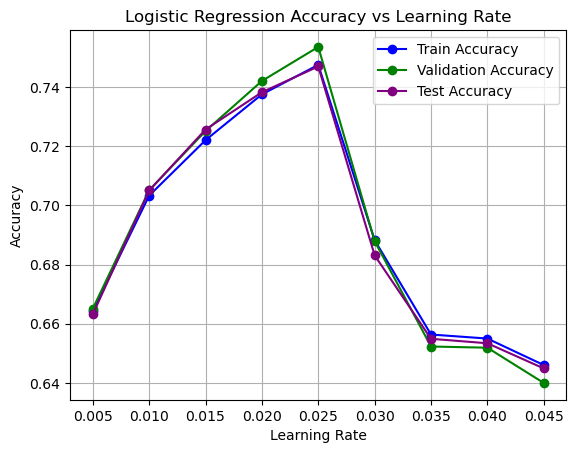

In [12]:
train_accuracies = []
val_accuracies = []
test_accuracies = []

for param in params:
    w = logistic_regression(X_train, y_train, 5, 5000, param)
    
    train_predictions = softmax_prediction(X_train, w)
    train_accuracy = accuracy(y_train.reshape(1, -1)[0], train_predictions)
    train_accuracies.append(train_accuracy)

    val_predictions = softmax_prediction(X_val, w)
    val_accuracy = accuracy(y_val.reshape(1, -1)[0], val_predictions)
    val_accuracies.append(val_accuracy)

    test_predictions = softmax_prediction(X_test, w)
    test_accuracy = accuracy(y_test.reshape(1, -1)[0], test_predictions)
    test_accuracies.append(test_accuracy)

plt.plot(params, train_accuracies, marker='o', color='blue', label='Train Accuracy')
plt.plot(params, val_accuracies, marker='o', color='green', label='Validation Accuracy')
plt.plot(params, test_accuracies, marker='o', color='purple', label='Test Accuracy')

plt.title('Logistic Regression Accuracy vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.show()